In [1]:
#Question 1a

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform
import seaborn as sns

In [16]:
def f(x):
    return 0.5 * np.exp(-np.abs(x))

In [17]:
def log_f(x):
    return np.log(0.5) - np.abs(x)

In [18]:
N = 10000
s = 1
x = np.zeros(N+1)

In [19]:
for i in range (1, N+1):
    x_star = norm.rvs(loc=x[i-1], scale=s)
    log_r = log_f(x_star) - log_f(x[i-1])
    u = np.log(uniform.rvs())
    if u < log_r:
        x[i] = x_star
    else:
        x[i] = x[i-1]

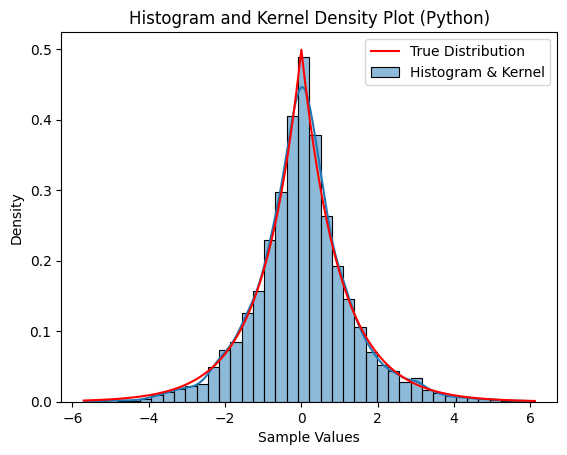

In [20]:
sns.histplot(x[1:], bins=40, stat='density', kde=True, label='Histogram & Kernel')
x_values = np.linspace(min(x), max(x), 1000)
plt.plot(x_values, f(x_values), 'r', label='True Distribution')
plt.xlabel('Sample Values')
plt.ylabel('Density')
plt.title('Histogram and Kernel Density Plot (Python)')
plt.legend()
plt.show()

In [21]:
sample_mean = np.mean(x[1:])
sample_std = np.std(x[1:])

print("Sample Mean:", round(sample_mean, 2))
print("Sample Standard Deviation:", round(sample_std, 2))

Sample Mean: 0.03
Sample Standard Deviation: 1.28


In [22]:
#Question 1b

In [29]:
def f(x):
    return 0.5 * np.exp(-np.abs(x))

In [30]:
def random_walk_metropolis(x0, N, s):
    samples = np.zeros(N)
    samples[0] = x0

    for i in range(1, N):
        x_star = np.random.normal(loc=samples[i-1], scale=s)
        r = f(x_star) / f(samples[i-1])
        u = np.random.uniform(0,1)
        if np.log(u) < np.log(r):
            samples[i] = x_star
        else:
            samples[i] = samples[i-1]

    return samples

In [31]:
def calculate_r_hat(N, J, s_values):
    r_hat_values = []
    
    for s in s_values:
        M_j_values = []
        V_j_values = []
        
        for j in range(1, J):
            samples = random_walk_metropolis(j, N, s)
            M_j = np.mean(samples)
            V_j = np.var(samples, ddof=1)
            M_j_values.append(M_j)
            V_j_values.append(V_j)
            
        W = np.mean(V_j_values)
        M = np.mean(M_j_values)
        B = np.mean((np.array(M_j_values) - M)**2)
        r_hat = np.sqrt((B + W) / W)
        r_hat_values.append(r_hat)

    return r_hat_values

In [32]:
N = 2000
J = 4
x0 = 0
s_values = np.linspace(0.001, 1, 100)

In [33]:
r_hat_values = calculate_r_hat(N, J, s_values)
r_hat_values

[39.63446819315665,
 4.9337147536087835,
 3.984075765654435,
 2.465585408979316,
 1.7071143230028456,
 1.794208803740023,
 1.0919612607549263,
 1.009108751543044,
 1.1305448884228684,
 1.2544506352083447,
 1.2898000999958799,
 1.176387826503596,
 1.1076109803360579,
 1.0675796810258167,
 1.0750697987362643,
 1.0516105426109894,
 1.0266730347806572,
 1.0076857624884623,
 1.0714000377150068,
 1.0203161557377847,
 1.0069666600441816,
 1.016989331736519,
 1.0266396205378945,
 1.0775991710260377,
 1.0264345206067242,
 1.001561639240696,
 1.0049983068143031,
 1.0251147010967097,
 1.0494228661783018,
 1.020447300225669,
 1.0107070252653807,
 1.000615099967497,
 1.0328734678191722,
 1.0321132684626928,
 1.0321620580387971,
 1.0000422207972877,
 1.0194049447756746,
 1.0097206095940097,
 1.0033237872894882,
 1.031141072978222,
 1.0075030273723908,
 1.0003872248314094,
 1.0056536370902573,
 1.0109738077271604,
 1.013810567850028,
 1.0015054468423235,
 1.002306387442712,
 1.0045034181366292,
 1.00

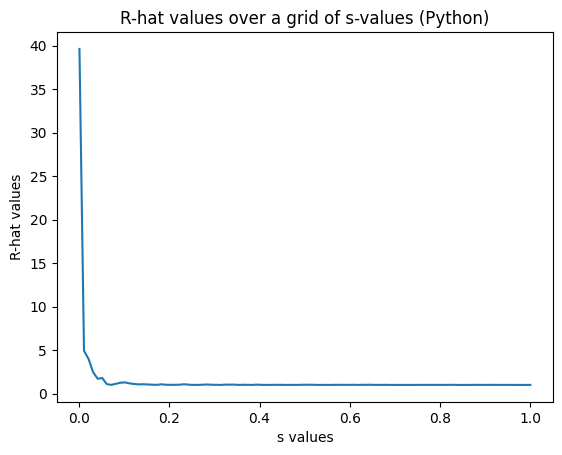

In [34]:
plt.plot(s_values, r_hat_values)
plt.xlabel('s values')
plt.ylabel('R-hat values')
plt.title('R-hat values over a grid of s-values (Python)')
plt.grid(False)
plt.show()